# Echelon Form and Row Reduced Echelon Form of a Rectangular System with applications: Block Matrix Multiplication, Matrix Inversion, Spanning sets of all the four fundamental subspaces, Image compression

---
This notebook introduces how to computation of the Row Reduced Echelon Form using the Symbolic Package (Sympy). Then, the implementations of Echelon Form, Echelon Form with Partial Pivoting, Row Reduced Echelon Form and Row Reduced Echelon Form with Partial Pivoting are provided, with related example. Lastly, several applications of these implemented methods are provided, such as:

* Block Matrix Multiplication
* Matrix Inverse
* Comparing of the spanning sets of all the four fundamental subspaces using the Row Reduced Echelon Form obtained by sympy method, with respect to the implemented one
* Image compression

## Import libraries

In [1]:
import sympy as sym
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##  Computing the Row Reduced Echelon Form using the method *rref* from **symbolic package** (***sympy***)

### Test on a matrix **A** with three rows and seven columns

In [2]:
# Definition of the matrix A
A = sym.Matrix([[1, 2, 2, 3, 1, 0, 0],
                [2, 4, 1, 3, 0,1,0],
                [3, 6, 1, 4,0,0,1]])
print("Matrix A: {} ".format(A))

# Use sympy.rref() method to compute the row reduce echelon form.
# The method rref returns a matrix in the row reduce echelon form and
# a vector with the index of pivots (position of basic columns in the matrix).
A_rref = A.rref()

# print the row reduce  form of the matrix A and the indexes of the basic columns
print("\nThe Row Reduced Echelon Form of matrix A and the pivot columns are: {}"
      .format(A_rref))

Matrix A: Matrix([[1, 2, 2, 3, 1, 0, 0], [2, 4, 1, 3, 0, 1, 0], [3, 6, 1, 4, 0, 0, 1]]) 

The Row Reduced Echelon Form of matrix A and the pivot columns are: (Matrix([
[1, 2, 0, 1, 0, -1,  1],
[0, 0, 1, 1, 0,  3, -2],
[0, 0, 0, 0, 1, -5,  3]]), (0, 2, 4))


### Test on a matrix **B** with four rows and six columns

In [3]:
# Definition of the matrix B
B = sym.Matrix([[1, 1, 2, 2, 1, 1], [2, 2, 4, 4, 3, 1],
                [2, 2, 4, 4, 2, 2], [3, 5, 8, 6, 5, 3]])
print("Matrix B: {} ".format(B))

B_rref = B.rref()

# Print the row reduce form of the matrix B and the indexes of the basic columns
print("\nThe Row Reduced Echelon Form of matrix B and the pivot columns are: {}"
      .format(B_rref))

Matrix B: Matrix([[1, 1, 2, 2, 1, 1], [2, 2, 4, 4, 3, 1], [2, 2, 4, 4, 2, 2], [3, 5, 8, 6, 5, 3]]) 

The Row Reduced Echelon Form of matrix B and the pivot columns are: (Matrix([
[1, 0, 1, 2, 0,  1],
[0, 1, 1, 0, 0,  1],
[0, 0, 0, 0, 1, -1],
[0, 0, 0, 0, 0,  0]]), (0, 1, 4))


## Echelon Form, Echelon Form with Partial Pivoting, Row Reduced Echelon Form and Row Reduced Echelon Form with Partial Pivoting

### Function to compute the Echelon Form
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Echelon Form of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix

In [4]:
def echelon_form(A):
  # In this implementation, we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrieve the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0, m):
    # Used to check if we need to move to the next column
    ech = True

    while ech & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not considering the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we knew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero), we can perform the row exchange.
      #
      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.
      #
      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # tiny value which is near to zero.
      if abs(U[i, j]) > 1e-15:
        # Perform permutation between row i and row indm
        # to move the greatest value in column in the pivotal position
        U[[i, indm], :] = U[[indm, i], :]

      # If the pivotal element is different from zero,
      # we can apply the row elimination
      if abs(U[i, j]) > 1e-15:
        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination, and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element at one time.
        M = U[i + 1 : m, j] / U[i, j]

        # In numpy array, there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i + 1 : m, j + 1 : n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i + 1 : m, j] = 0

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech = True
  return U, ind_basic_cols

#### Test on a matrix **C** with three rows and four columns

In [5]:
C = np.array([[1., 2., 2., 3.], [2, 4, 1, 3], [3, 6, 1, 4]])
print("Matrix C: \n{}".format(C))

U, ind_basic_cols = echelon_form(C)
print("\nThe Echelon form of matrix C: \n{}".format(U))
print("\nThe basic columns of matrix C: {}".format(ind_basic_cols))

Matrix C: 
[[1. 2. 2. 3.]
 [2. 4. 1. 3.]
 [3. 6. 1. 4.]]

The Echelon form of matrix C: 
[[3.00000000e+00 6.00000000e+00 1.00000000e+00 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66666667e+00 1.66666667e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]]

The basic columns of matrix C: [0, 2]


### Function to compute the Echelon Form with Partial Pivoting
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Echelon Form using Partial Pivoting of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix
  * **perm_matrix**: The permutation matrix used to compute the Partial Pivoting

In [6]:
def echelon_form_with_partial_pivot(A):
  # In this implementation we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrieve the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Create an identity matrix of size mxm
  # to use as permutation matrix
  perm_matrix = np.eye(m)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0, m):
    # Used to check if we need to move to the next column
    ech = True

    while ech & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not considering the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we knew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero), we can perform the row exchange.

      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.

      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # tiny value which is near to zero.
      if (indm != i) & (abs(U[indm, j]) > 1e-15):
        # Perform permutation between row i and row indm
        # to move the greatest value in column in the pivotal position
        U[[i, indm], :] = U[[indm, i], :]

        # Update the permutation matrix to save all the
        # permutation that we will perform
        perm_matrix[[i, indm], :] = perm_matrix[[indm, i], :]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if abs(U[i, j]) > 1e-15:
        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1 : m, j] / U[i, j]

        # In numpy array, there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i + 1 : m, j + 1 : n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i + 1 : m, j] = 0

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech = True
  return U, ind_basic_cols, perm_matrix

#### Test on a matrix **C** with three rows and four columns
**NB:** The Echelon Form and The Row Reduced Echelon Form (also implementing the Partial Pivoting) are not a good methods to compute the rank of a matrix.
In fact, when we compute by hands the rank of a matrix we could obtain a number (n), but when we compute numerically we could obtain something different. In the example below, we know that by hands in position (3,4) there is 0, so the rank = 2, but on a machine we obtain 1e-16, which is different from 0. So,theoretically the rank is 3 but numerically 1e-16 could be considered zero, which means that the rank numerically is 2.
**Because of this problem, the computation of the matrix rank is a challenging problem; thus, we will use more advanced algorithms.**

In [7]:
C = np.array([[1., 2., 2., 3.], [2., 4., 1., 3.], [3., 6., 1., 4.]])
print("Matrix C: \n{}".format(C))

U, ind_basic_cols, perm_matrix = echelon_form_with_partial_pivot(C)
print("\nThe Echelon Form with Partial Pivoting of matrix C: \n{}".format(U))
print("\nThe basic columns of matrix C: {}".format(ind_basic_cols))
print("\nThe Permutation matrix used to perform the Partial Pivoting on C:\n{}\n".format(perm_matrix))
print("Computing by hands the Echelon Form with Partial Pivoting of C, we will find that rank(C) = 2.\n" +
      "Looking at U, from a theoretically point of view, we should consider that rank(C) = 3 because 1.11022302e-16 =/= 0.\n" +
      "From a numerically point of view 1.11022302e-16 is something very small (roundoff error).\n" +
      "So, we can consider zero, which means that rank(C) = 2.")

Matrix C: 
[[1. 2. 2. 3.]
 [2. 4. 1. 3.]
 [3. 6. 1. 4.]]

The Echelon Form with Partial Pivoting of matrix C: 
[[3.00000000e+00 6.00000000e+00 1.00000000e+00 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66666667e+00 1.66666667e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]]

The basic columns of matrix C: [0, 2]

The Permutation matrix used to perform the Partial Pivoting on C:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Computing by hands the Echelon Form with Partial Pivoting of C, we will find that rank(C) = 2.
Looking at U, from a theoretically point of view, we should consider that rank(C) = 3 because 1.11022302e-16 =/= 0.
From a numerically point of view 1.11022302e-16 is something very small (roundoff error).
So, we can consider zero, which means that rank(C) = 2.


### Function to compute the Row Reduced Echelon Form
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Row Reduced Echelon Form of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix A

In [8]:
def row_reduced_echelon_form(A):
  # In this implementation, we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrieve the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0,m):
    # Used to check if we need to move to the next column
    ech = True

    while ech & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not consider the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we knew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero) we can perform the row exchange.
      #
      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.
      #
      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # tiny value which is near to zero.
      if abs(U[indm, j]) > 1e-15:
        # Perform permutation between row i and row idm
        U[ [i, indm], :] = U[[indm, i], :]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if abs(U[i,j]) > 1e-15:
        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1: m, j] / U[i, j]

        # In numpy array, there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i + 1 : m, j + 1 : n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i+1:m,j]=0

        # Divided all the row by the pivotal element in order to put the pivotal
        # element equals to 1
        U[i, j : n] = U[i, j : n] / U[i, j]

        if i > 0:
          # If we are working on a row different from the first row, we need to
          # perform a linear combination in order to put zero also above the pivot.
          # So, we compute the coefficient M needed to compute the row elimination.
          M = U[0: i, j]/U[i, j]
          U[0 : i, j : n] = U[0: i, j: n] - np.outer(M, U[i, j : n])

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech= True
  return U, ind_basic_cols

#### Test on a matrix **D** with three rows and seven columns

In [9]:
D = np.array([[1., 2., 2., 3., 1., 0., 0.], [2., 4., 1., 3., 0., 1., 0.], [3., 6., 1., 4., 0., 0., 1.]])
print("Matrix D: \n{}".format(D))

U, ind_basic_cols = row_reduced_echelon_form(D)
print("\nThe Row Reduced Echelon form of matrix D: \n{}".format(U))
print("\nThe basic columns of matrix D: \n{}".format(ind_basic_cols))

Matrix D: 
[[1. 2. 2. 3. 1. 0. 0.]
 [2. 4. 1. 3. 0. 1. 0.]
 [3. 6. 1. 4. 0. 0. 1.]]

The Row Reduced Echelon form of matrix D: 
[[ 1.00000000e+00  2.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  3.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
   1.00000000e+00 -5.00000000e+00  3.00000000e+00]]

The basic columns of matrix D: 
[0, 2, 4]


### Function to compute the Row Reduced Echelon Form with Partial Pivoting
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Row Reduced Echelon Form using Partial Pivoting of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix A
  * **perm_matrix**: The permutation matrix used to compute the Partial Pivoting

In [10]:
def row_reduced_echelon_form_with_partial_pivot(A):
  # In this implementation, we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrieve the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Create an identity matrix of size mxm
  # to use as permutation matrix
  perm_matrix = np.eye(m)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0,m):
    # Used to check if we need to move to the next column
    ech = True

    while ech & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not considering the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we neew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero) we can perform the row exchange.
      #
      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.
      #
      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # tiny value which is near to zero.
      if (indm != i) & (abs(U[indm,j]) > 1e-15):

        # Perform permutation between row i and row idm
        U[[i, indm], :] = U[[indm, i], :]

        # Update the permutation matrix to save all the
        # permutation that we will perform
        perm_matrix[ [i, indm],:] = perm_matrix[[indm,i],:]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if abs(U[i,j]) > 1e-15:

        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1 : m, j] / U[i, j]

        # In numpy array, there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i+1:m,j+1:n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i + 1 : m, j] = 0

        # Divided all the row by the pivotal element to put the pivotal
        # element equals to 1
        U[i, j : n] = U[i, j : n] / U[i, j]

        if i > 0:
          # If we are working on a row different from the first row, we need to
          # perform a linear combination in order to put zero also above the pivot.
          # So, we compute the coefficient M needed to compute the row elimination.
          M= U[0 : i , j] / U[i, j]
          U[0 : i, j : n] = U[0 : i, j : n] - np.outer(M, U[i, j : n])

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech = True

  return U, ind_basic_cols, perm_matrix

#### Test on a matrix **D** with three rows and seven columns

In [11]:
D = np.array([[1., 2., 2., 3., 1., 0., 0.], [2., 4., 1., 3., 0., 1., 0.], [3., 6., 1., 4., 0., 0., 1.]])
print("Matrix D: \n{}".format(D))

U, ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(D)
print("\nThe Row Reduced Echelon form of matrix D: \n{}".format(U))
print("\nThe basic columns of matrix D: {}".format(ind_basic_cols))
print("\nThe Permutation matrix used to perform the Partial Pivoting on D: \n{}".format(perm_matrix))

Matrix D: 
[[1. 2. 2. 3. 1. 0. 0.]
 [2. 4. 1. 3. 0. 1. 0.]
 [3. 6. 1. 4. 0. 0. 1.]]

The Row Reduced Echelon form of matrix D: 
[[ 1.00000000e+00  2.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  3.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
   1.00000000e+00 -5.00000000e+00  3.00000000e+00]]

The basic columns of matrix D: [0, 2, 4]

The Permutation matrix used to perform the Partial Pivoting on D: 
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


## Applications of Row Reduced Echelon Form

### Block Matrix Multiplication
In this example, we will show how we can define **block matrix** and how to compute the matrix product between blocks.

In [12]:
A = np.block([[np.eye(2) * 2, np.zeros((2, 3))], [np.ones((3, 2)), np.eye(3) * 3]])
print("Block Matrix A: \n{}".format(A))
print("\nFirst block:\n {}\n\n Second block:\n {}".format(A[0:2,0:2], A[0:2,2:]))
print("\nThird block: \n{}\n\nFourth block: \n{}".format(A[2:,0:2], A[2:,2:]))

Block Matrix A: 
[[2. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [1. 1. 3. 0. 0.]
 [1. 1. 0. 3. 0.]
 [1. 1. 0. 0. 3.]]

First block:
 [[2. 0.]
 [0. 2.]]

 Second block:
 [[0. 0. 0.]
 [0. 0. 0.]]

Third block: 
[[1. 1.]
 [1. 1.]
 [1. 1.]]

Fourth block: 
[[3. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]


In [13]:
B = np.block([[np.random.random((2, 3)), np.random.random((2, 1))], [np.eye(3) * 3, np.ones((3, 1)),]])
print("Block Matrix B: \n{}".format(B))
print("\nFirst block:\n {}\n\n Second block:\n {}".format(B[0:2,0:3], B[0:2,3:]))
print("\nThird block: \n{}\n\nFourth block: \n{}".format(B[2:,0:3], B[2:,3:]))

Block Matrix B: 
[[0.21510656 0.11739697 0.25812542 0.15715205]
 [0.6157166  0.94750731 0.24410357 0.77313338]
 [3.         0.         0.         1.        ]
 [0.         3.         0.         1.        ]
 [0.         0.         3.         1.        ]]

First block:
 [[0.21510656 0.11739697 0.25812542]
 [0.6157166  0.94750731 0.24410357]]

 Second block:
 [[0.15715205]
 [0.77313338]]

Third block: 
[[3. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]

Fourth block: 
[[1.]
 [1.]
 [1.]]


In [14]:
print("The block matrix product A*B is: \n{}".format(np.dot(A,B)))

The block matrix product A*B is: 
[[ 0.43021312  0.23479395  0.51625083  0.3143041 ]
 [ 1.2314332   1.89501461  0.48820715  1.54626677]
 [ 9.83082316  1.06490428  0.50222899  3.93028543]
 [ 0.83082316 10.06490428  0.50222899  3.93028543]
 [ 0.83082316  1.06490428  9.50222899  3.93028543]]


### Matrix Inverse
In this application, we will use the *Row reduced echelon form* to compute the matrix inverse. Given the matrix $A$, we will compute the inverse $A^{-1}$, by applying the *Row reduced echelon form with partial pivoting* (Gauss-Jordan algorithm). We will show that we are not able to obtain the perfect identity matrix $I$, computing $AA^{-1}$ or $A^{-1}A$.

Lastly, we will compare the computational time required to find the inverse by using the numpy package, with respect to the implemented row reduced echelon form algorithm.


#### Matrix inversion and roundoff error
In this example, we compute the inverse of a matrix using the *Row reduced echelon form with partial pivoting* (Gauss-Jordan algorithm). We want to show that if we compute the original matrix $A$ with its inverse $A^{-1}$, we will not obtain again the perfect identity matrix (in the position where should appear the zero elements, we will have something related to the machine precision that could be considered zero).

In [15]:
A = np.random.rand(3,3)
I = np.eye(3)

# Define the augmented matrix using the block (A and the Identity matrix)
AI = np.block([A, I])
print("Matrix A - Random matrix (First block of [A|I]): \n{}\n".format(A))
print("Matrix I - Identity matrix (Second block of [A|I]): \n{}\n".format(I))
print("Matrix [A|I]: \n{}".format(AI))

Matrix A - Random matrix (First block of [A|I]): 
[[0.87266543 0.56999481 0.04512414]
 [0.57677764 0.00520806 0.48776217]
 [0.74483768 0.63030749 0.25591873]]

Matrix I - Identity matrix (Second block of [A|I]): 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matrix [A|I]: 
[[0.87266543 0.56999481 0.04512414 1.         0.         0.        ]
 [0.57677764 0.00520806 0.48776217 0.         1.         0.        ]
 [0.74483768 0.63030749 0.25591873 0.         0.         1.        ]]


In [16]:
U, ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(AI)
print("\nThe Row Reduced Echelon form of matrix [A|I]: \n{}".format(U))

A_inv = U[0:3, 3:6]
print("\nFirst Block of the Row Reduced Echelon "
      +"Form of the augmented matrix [A|I]: \n{}".format(U[0:3,0:3]))
print("\nSecond Block of the Row Reduced Echelon "
      +"Form of the augmented matrix [A|I], which is the inverse of A: \n{}\n".format(A_inv))


The Row Reduced Echelon form of matrix [A|I]: 
[[ 1.          0.          0.          2.39231806  0.91775181 -2.17098577]
 [ 0.          1.          0.         -1.6857229  -1.48272713  3.12319855]
 [ 0.          0.          1.         -2.81091136  0.98077186  2.53383786]]

First Block of the Row Reduced Echelon Form of the augmented matrix [A|I]: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Second Block of the Row Reduced Echelon Form of the augmented matrix [A|I], which is the inverse of A: 
[[ 2.39231806  0.91775181 -2.17098577]
 [-1.6857229  -1.48272713  3.12319855]
 [-2.81091136  0.98077186  2.53383786]]


In [17]:
print("Computing A*A_inv we will not obtain the perfect identity matrix: \n{}".format(np.dot(A,A_inv)))

Computing A*A_inv we will not obtain the perfect identity matrix: 
[[ 1.00000000e+00  8.95228198e-17 -6.72128424e-17]
 [-2.08601573e-16  1.00000000e+00 -3.62796456e-17]
 [-3.08648307e-16  8.03856424e-17  1.00000000e+00]]


In [18]:
print("Computing A_inv*A we will not obtain the perfect identity matrix: \n{}".format(np.dot(A_inv,A)))

Computing A_inv*A we will not obtain the perfect identity matrix: 
[[ 1.00000000e+00 -4.92583663e-16 -1.27263078e-16]
 [ 3.70994784e-16  1.00000000e+00  2.22348130e-16]
 [ 1.15829501e-16  2.19747707e-16  1.00000000e+00]]


#### Comparison of the computational time to compute the matrix inverse
In this example, we will compare the computational time required to compute the inverse of a matrix using the *numpy.linalg.inv()* method, with respect to the *Row reduced echelon form with partial pivoting* (Gauss-Jordan algorithm). This example will show that we should not use the RREF to compute the inverse because it requires solving $n$ linear system, so it is very expensive.

In [19]:
A = np.random.rand(2500, 2500)
I = np.eye(2500)

# Define the augmented matrix using the block (A and the Identity matrix)
AI = np.block([A, I])
print("Matrix A - Random matrix (First block of [A|I]): \n{}\n".format(A))
print("Matrix [A|I]: \n{}".format(AI))

Matrix A - Random matrix (First block of [A|I]): 
[[0.44311463 0.63933609 0.1120573  ... 0.5000257  0.87977031 0.02896116]
 [0.07941034 0.34029468 0.32936243 ... 0.89111432 0.70983141 0.14428179]
 [0.85374692 0.55350103 0.19065962 ... 0.00183775 0.0606588  0.01568274]
 ...
 [0.35059349 0.23034232 0.92049684 ... 0.45446836 0.4739268  0.80189748]
 [0.50248746 0.73640774 0.27918125 ... 0.72993117 0.86811505 0.20551026]
 [0.00455379 0.27955567 0.05080761 ... 0.12586863 0.18867061 0.38594422]]

Matrix [A|I]: 
[[0.44311463 0.63933609 0.1120573  ... 0.         0.         0.        ]
 [0.07941034 0.34029468 0.32936243 ... 0.         0.         0.        ]
 [0.85374692 0.55350103 0.19065962 ... 0.         0.         0.        ]
 ...
 [0.35059349 0.23034232 0.92049684 ... 1.         0.         0.        ]
 [0.50248746 0.73640774 0.27918125 ... 0.         1.         0.        ]
 [0.00455379 0.27955567 0.05080761 ... 0.         0.         1.        ]]


In [20]:
t0 = time.process_time()
np.linalg.inv(A)
t1 = time.process_time() - t0
print("Time required to compute the inverse of A,\n" +
      "with shape {}, using the np.linalg.inv() method: {}.".format(A.shape, t1))

Time required to compute the inverse of A,
with shape (2500, 2500), using the np.linalg.inv() method: 9.109375.


In [21]:
t0 = time.process_time()
row_reduced_echelon_form_with_partial_pivot(AI)
t1 = time.process_time() - t0
print("Time required to compute the inverse of A,\n" +
      "with shape {}, using the Row reduced echelon form method: {}.".format(A.shape, t1))

Time required to compute the inverse of A,
with shape (2500, 2500), using the Row reduced echelon form method: 342.171875.


### Computing the spanning sets for all the four fundamental subspaces
Given a matrix $A \in \mathbb{R}^{m \times n}$, the four fundamental subspaces of the matrix $A$ are:
* $R(A) = \{b = Ax \mid x 	\in \mathbb{R} ^{n} \} \subseteq \mathbb{R}^{m}, b \in \mathbb{R}^{m} $
* $R(A^{T}) = \{d = A^{T} y \mid y \in \mathbb{R} ^{m} \} \subseteq \mathbb{R}^{n}, d \in \mathbb{R}^{n} $
* $N(A) = \{x \in \mathbb{R}^{n} \mid Ax = 0\} \subseteq \mathbb{R}^{n}$
* $N(A^{T}) = \{y \in \mathbb{R}^{m} \mid A^{T}y = 0\} \subseteq \mathbb{R}^{m}$

Moreover, to compute the four fundamental subspaces, remember that:
* the basic columns of $A$ span the $R(A)$
* the non-zero rows of the reduced form of $A$ span the $R(A^{T})$
* the vectors $h_1, h_2, ..., h_{n-r}$, which are obtained by solving the homogeneous linear system, span the $N(A)$
* the last $m-r$ rows of the matrix $M$, such that $MA = U$, span the $N(A^T)$

#### Function to compute the fundamental subspaces 
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **range_A**: The range of the matrix $A$, $R(A)$
  * **range_A_transpose**: The range of the matrix $A^T$, $R(A^T)$
  * **nullspace_A**: The nullspace of the matrix $A$, $N(A)$
  * **nullspace_A_transpose**: The nullspace of the matrix $A^T$, $N(A^T)$


In [75]:
def compute_four_fundamental_subspaces(A):
  m,n = A.shape
  #AI = np.block([A, np.eye(m)])
  
  # Compute the row reduced echelon form
  U, ind_basic_cols, perm = row_reduced_echelon_form_with_partial_pivot(A)
  
  # Find the rank of a matrix, which is the number of basic columns
  rank = len(ind_basic_cols)
  
  # Computing the R(A)
  range_A = A[:, ind_basic_cols]
  
  # Computing the R(A_transpose)
  range_A_transpose = U[0:rank, :]
  
  # Computing the N(A)
  nullspace_A = np.linalg.solve(A, np.zeros(m))  
  
  # Computing the N(A_transpose)
  
  print(U)
  print(ind_basic_cols)
  print("\n")
  return range_A, range_A_transpose, nullspace_A

In [ ]:
RA, RA_T, NA = compute_four_fundamental_subspaces(
  np.array([[1, 2, 2, 1, 7],[-2, 4, 5, 4, -2],[1, 2, 1, 1, 5],[-2, -4, 4, 4, -2],[1, 2, 2, 4, 9]]))
print("The range of A - R(A): \n{}".format(RA))
print("\nThe range of A transpose - R(A_tr): \n{}".format(RA_T.T))
print("\nThe null space of A - N(A): \n{}".format(NA))
print("\nThe null space of A transpose - N(A_tr): \n{}".format(0))

#### Test
**Exercise 4.2.1 - page 178, Carl Meyer**:
* Use the function *row_reduced_form_with_partial_pivot* to compute the row reduced form of the given matrix, identify the index of the basic columns and the rank of the matrix
* Find the Spanning sets for all the four fundamental subspaces

In [22]:
E = np.array([[1, 2, 1, 1, 5],[-2, -4, 0, 4, -2],[1, 2, 2, 4, 9]])
print("Matrix E: {}".format(E))
print("-------------------------------------------------------------------------")

U, ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(E)
print("The Row Reduced Echelon Form of matrix E is: {}\nThe index of basic columns are: {}\nThe rank of matrix E is: {}".format(U, ind_basic_cols, len(ind_basic_cols)))
print("-------------------------------------------------------------------------")

RA, RA_T, NA, NA_T = compute_four_fundamental_subspaces(E)
print("\nThe spanning sets of all the four fundamental subspaces: ")
print("\bThe range of A - R(A): \n{}".format(RA))
print("\nThe range of A transpose - R(A_tr): \n{}".format(RA_T.T))
print("\nThe null space of A - N(A): \n{}".format(NA))
print("\nThe null space of A transpose - N(A_tr): \n{}".format(0))

Matrix E: Matrix([[1, 2, 1, 1, 5], [-2, -4, 0, 4, -2], [1, 2, 2, 4, 9]])

1) Using sym.rref function
-------------------------------------------------------------------------
The Row Reduced Echelon Form of matrix E and the pivot columns are: 
(Matrix([
[1, 2, 0, -2, 1],
[0, 0, 1,  3, 4],
[0, 0, 0,  0, 0]]), (0, 2))

The spanning sets of all the four fundamental subspaces: TODO 

2) Using row_reduced_form_with_partial_pivot function
-------------------------------------------------------------------------
The Row Reduced Echelon Form of matrix E and the pivot columns are: 
[[1 2 0 -2 1]
 [0 0 1 3 4]
 [0 0 0 0 0]] [0, 2]

The spanning sets of all the four fundamental subspaces: TODO 


### Image compression
In this application, we will check how we can use the row reduced echelon form to compress an image. We won't compress an image in terms of "reduction of size without modify the original image" but we will compress it in terms of "pixel reduction".
An image is a tensor made up by the 3 RGB channel. Because of the effort related to work with tensor, we will convert the original image (tensor) in a gray scale image (matrix).
Then, we can apply on this matrix of pixels the required method to compress it.
In particular, we compute the Row Reduced Echelon Form of the matrix to identify the basic columns. At this point, we can reconstruct the image using only the basic columns, which are columns that preserve the main scene, although making a reduction of the total number of pixels.

#### Gray scale compression (vertically/horizontally) using the Row Reduced Echelon Form with Partial Pivoting
* INPUT
  * **img_input**: Input image in RGB color
  * **compression_mode**: if set to **1**, the function compress the image in horizontal way; default is **0** to compress the image vertically

In [23]:
def gray_scale_img_compression_rref_partial_pivot(img_input, compression_mode = 0):

  if compression_mode == 0 or compression_mode == 1:
    # set rgb_weights used to convert the original RGB image to a Gray scale
    rgb_weights = [0.2989, 0.5870, 0.1140]

    # Convert the RGB image into Gray scale
    gray_img = np.dot(img_input, rgb_weights)

    # Create a copy of the original gray scale before transposition, if required
    gray_img_original = np.copy(gray_img)

    # If user select 1, then we will compress the image in horizontal way
    gray_img = gray_img.T if compression_mode == 1 else gray_img

    # Compute the Row Reduced Echelon Form to identify the basic columns
    U_gray_img, gray_img_ind_basic_cols, perm_matrix_gray_img = row_reduced_echelon_form_with_partial_pivot(gray_img)

    # Reconstruct the image using only the basic columns
    compress_gray_img = gray_img[:, gray_img_ind_basic_cols].T if compression_mode == 1 else gray_img[:, gray_img_ind_basic_cols]

    plt.figure(figsize=(12,6))

    plt.subplot(1,3,1)
    plt.imshow(img_input)
    plt.title("Original RGB image")

    plt.subplot(1,3,2)
    plt.imshow(gray_img_original, cmap = plt.get_cmap("gray"))
    plt.title("Gray-scale image")

    plt.subplot(1,3,3)
    plt.imshow(compress_gray_img, cmap = plt.get_cmap("gray"))
    plt.title("Compressed Gay-scale image")

    print("Shape of the original image in RBG color: {}".format(img_input.shape))
    print("Shape of the original image in Gray scale: {}".format(gray_img_original.shape))
    print("Shape of the compressed image in Gray scale: {}\n".format(compress_gray_img.shape))
  else:
    raise ValueError("\nInvalid compression mode selected! Valid compression mode: 0 - to compress vertically; 1 - to compress horizontally.")

##### Test of vertical compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (768, 768)


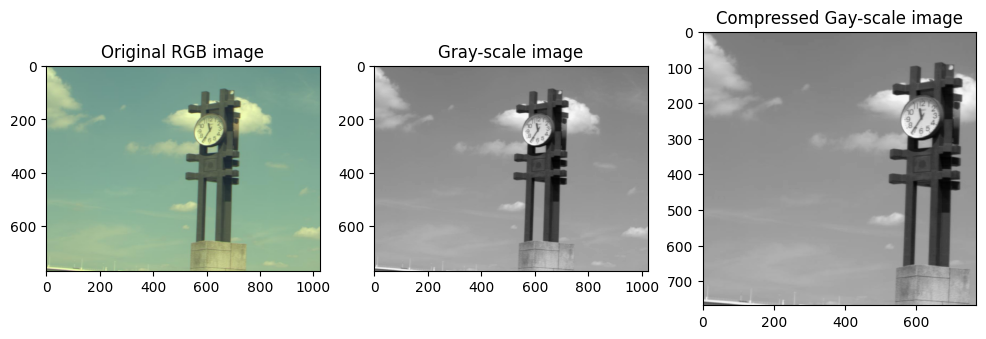

In [24]:
img = mpimg.imread('img-compression-1.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 0)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (768, 455)


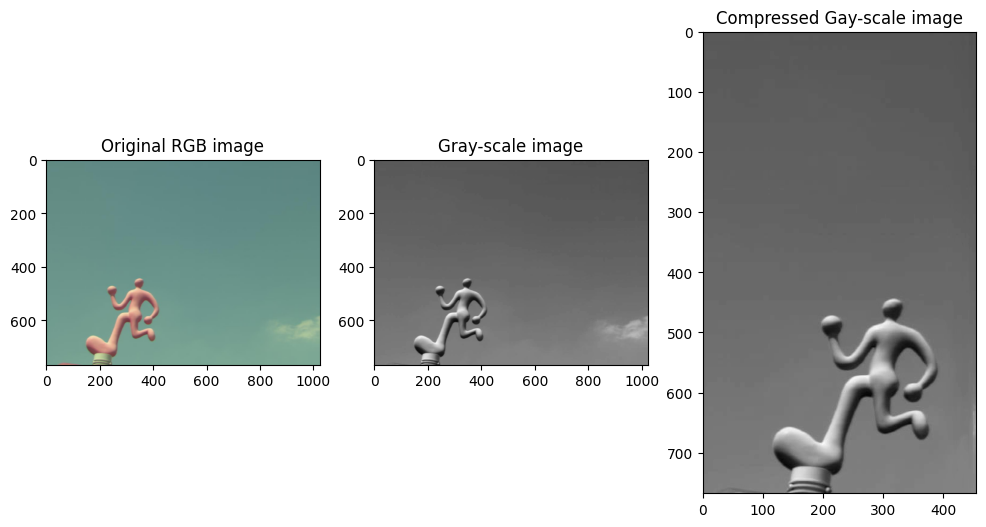

In [25]:
img = mpimg.imread('img-compression-2.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 0)

##### Test of horizontal compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (768, 1024)


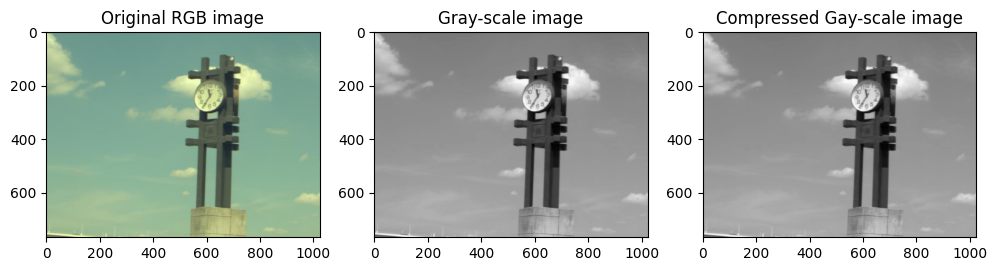

In [26]:
img = mpimg.imread('img-compression-1.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 1)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (452, 1024)


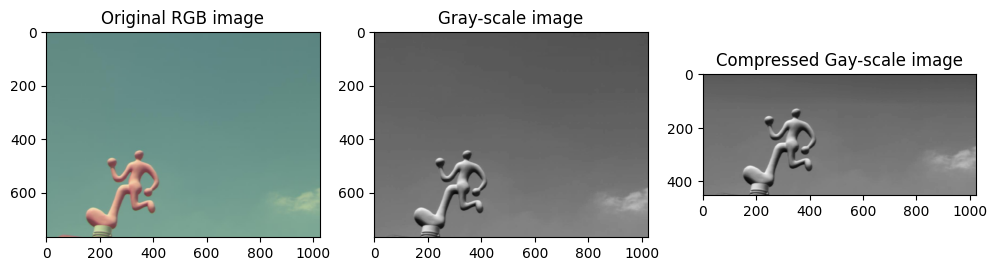

In [27]:
img = mpimg.imread('img-compression-2.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 1)

#### RGB single channel compression (vertically/horizontally) using the Row Reduced Echelon Form with Partial Pivoting
Definition of function to compress the original image into compressed (vertically/horizontal) image in RGB, using the Row Reduced Echelon Form with Partial Pivoting. The function compress the original image identifying the basic columns on each RGB channel, one channel at time. So, th results will be three different images, one for each channel compressed.



* INPUT
  * **img**: Input image in RGB color
  * **compression_mode**: if set to **1**, the function compress the image in horizontal way; default is **0** to compress the image vertically

In [28]:
def rgb_img_compression_rref_partial_pivot(img_input, compression_mode = 0):

  if compression_mode == 0 or compression_mode == 1:

    plt.figure(figsize=(12,4))
    plt.subplot(1, 4, 1)
    plt.imshow(img_input)
    plt.title("Original RGB image")
    print("Shape of the original image in RBG color: {}".format(img_input.shape))

    rgb_channel = {0:'R', 1:'G', 2:'B'}

    for i in range(0,3):
      # If user select 1, then we will compress the image in horizontal way. To do that,
      # we transpose only the selected channel.
      rgb_channel_image = img_input[:, :, i].T if compression_mode == 1 else img_input[:, :, i]

      # For each RGB channel, compute the Row Reduced Echelon Form to identify the basic columns.
      # If we work horizontally, the index of basic columns will be used to select the row to keep
      # in order to compress horizontally
      U_img, ind_basic_cols_img, perm_matrix_img = row_reduced_echelon_form_with_partial_pivot(rgb_channel_image)

      # Reconstruct the image using only the basic columns. If we compress vertically, then we
      # will keep the basic columns. If we are compress horizontally, then the index of the
      # basic columns is used to keep only the relevant rows
      compress_img = img_input[ind_basic_cols_img, :] if compression_mode == 1 else img_input[:,ind_basic_cols_img]

      plt.subplot(1, 4, i+2)
      plt.imshow(compress_img)
      plt.title("Compression on channel: {}".format(rgb_channel[i]))
      print("Shape of the compressed image on RBG channel {}: {}".format(rgb_channel[i], compress_img.shape))
    print("\n")
  else:
    raise ValueError("\nInvalid compression mode selected! Valid compression mode: 0 - to compress vertically; 1 - to compress horizontally.")

##### Test of vertical compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel R: (768, 768, 3)
Shape of the compressed image on RBG channel G: (768, 768, 3)
Shape of the compressed image on RBG channel B: (768, 768, 3)


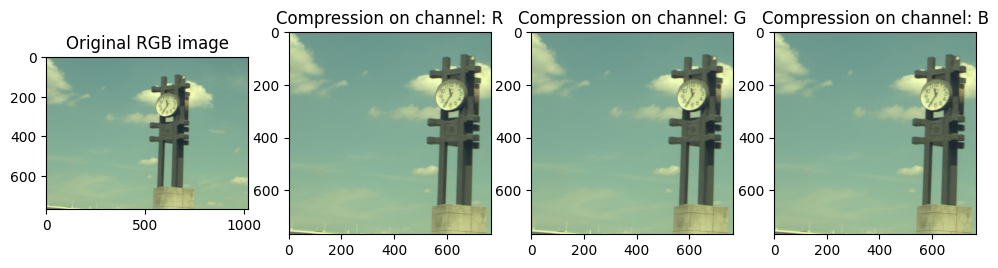

In [29]:
img = mpimg.imread('img-compression-1.jpg')
rgb_img_compression_rref_partial_pivot(img, 0)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel R: (768, 410, 3)
Shape of the compressed image on RBG channel G: (768, 416, 3)
Shape of the compressed image on RBG channel B: (768, 453, 3)


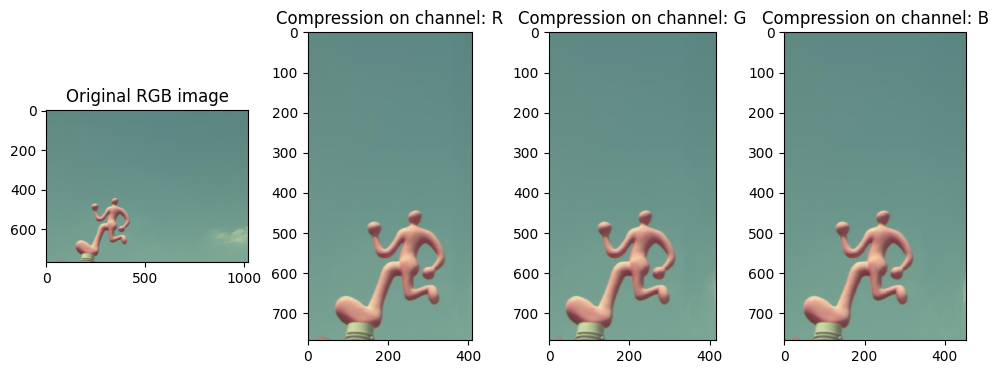

In [30]:
img = mpimg.imread('img-compression-2.jpg')
rgb_img_compression_rref_partial_pivot(img, 0)

##### Test of horizontal compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel R: (768, 1024, 3)
Shape of the compressed image on RBG channel G: (768, 1024, 3)
Shape of the compressed image on RBG channel B: (768, 1024, 3)


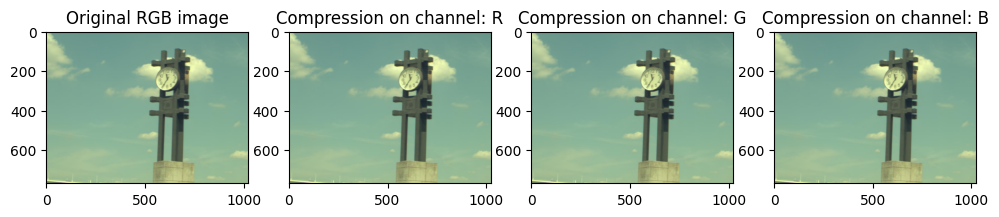

In [31]:
img = mpimg.imread('img-compression-1.jpg')
rgb_img_compression_rref_partial_pivot(img, 1)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel R: (409, 1024, 3)
Shape of the compressed image on RBG channel G: (435, 1024, 3)
Shape of the compressed image on RBG channel B: (449, 1024, 3)


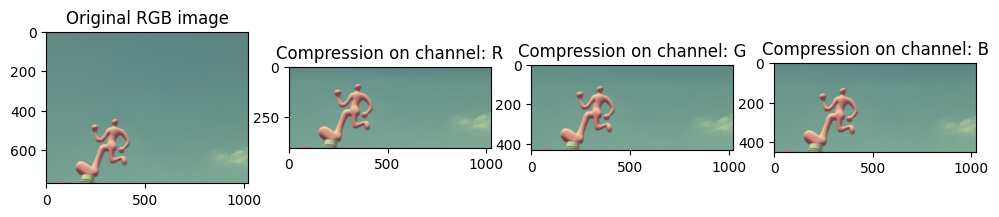

In [32]:
img = mpimg.imread('img-compression-2.jpg')
rgb_img_compression_rref_partial_pivot(img, 1)